### CONTENTS
#### 1 Importing Libraries
#### 2 Importing Data 
#### 3 Data wrangling
#### 4 Random Search Optimization
#### 5 Fit Random Forest Model with Optimal Hyperparameters
#### 6 Weather Feature Importance Analysis: Madrid


# 1 Importing Libraries

In [52]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import operator
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn import datasets  
from sklearn.ensemble import RandomForestClassifier
from sklearn.multioutput import MultiOutputClassifier
from sklearn.metrics import f1_score, classification_report
from numpy import argmax
from sklearn.model_selection import train_test_split
from sklearn import metrics  
from sklearn.tree import plot_tree
from sklearn import tree
from sklearn.metrics import accuracy_score


In [94]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import f1_score, classification_report, make_scorer

In [54]:
import time
from sklearn.model_selection import GridSearchCV
from scipy.stats import randint
from sklearn.model_selection import RandomizedSearchCV

import warnings
warnings.filterwarnings("ignore")
pd.set_option("display.max_columns", None)

# 2 Importing Data

In [57]:
path = r'C:\Users\elena\Documents\06.2025 climatewins machine learning'

In [59]:
# Upload cleaned data

In [61]:
climate = pd.read_csv(os.path.join(path, '02 Data', 'Prepared data', 'weather_cleaned1.csv'), index_col = False)

In [63]:
climate.head()

BASEL_cloud_cover  BASEL_humidity  BASEL_pressure  BASEL_global_radiation  \
0                  7            0.85           1.018                    0.32   
1                  6            0.84           1.018                    0.36   
2                  8            0.90           1.018                    0.18   
3                  3            0.92           1.018                    0.58   
4                  6            0.95           1.018                    0.65   

   BASEL_precipitation  BASEL_sunshine  BASEL_temp_mean  BASEL_temp_min  \
0                 0.09             0.7              6.5             0.8   
1                 1.05             1.1              6.1             3.3   
2                 0.30             0.0              8.5             5.1   
3                 0.00             4.1              6.3             3.8   
4                 0.14             5.4              3.0            -0.7   

   BASEL_temp_max  BELGRADE_cloud_cover  BELGRADE_humidity  BELGRADE_pressure  \
0            10.9                     1               0.81             1.0195   
1            10.1                     6               0.84             1.0172   
2             9.9                     6               0.77             1.0179   
3            10.6                     8               0.93             1.0268   
4             6.0                     8               0.99             1.0286   

   BELGRADE_global_radiation  BELGRADE_precipitation  BELGRADE_sunshine  \
0                       0.88                    0.00                7.0   
1                       0.25                    0.00                0.0   
2                       0.67                    0.00                3.5   
3                       0.25                    0.00                0.0   
4                       0.25                    0.06                0.0   

   BELGRADE_temp_mean  BELGRADE_temp_min  BELGRADE_temp_max  \
0                 3.7               -0.9                7.9   
1                 2.9                2.2                4.4   
2                 3.1               -0.5                6.4   
3                 2.0               -2.0                3.0   
4                 2.0                0.7                2.8   

   BUDAPEST_cloud_cover  BUDAPEST_humidity  BUDAPEST_pressure  \
0                     4               0.67              1.017   
1                     4               0.67              1.017   
2                     4               0.67              1.017   
3                     4               0.67              1.017   
4                     4               0.67              1.017   

   BUDAPEST_global_radiation  BUDAPEST_precipitation  BUDAPEST_sunshine  \
0                       0.44                    0.01                2.3   
1                       0.18                    0.31                0.0   
2                       0.30                    0.00                0.6   
3                       0.19                    0.00                0.0   
4                       0.19                    0.00                0.0   

   BUDAPEST_temp_mean  BUDAPEST_temp_min  BUDAPEST_temp_max  \
0                 2.4               -0.4                5.1   
1                 2.3                1.4                3.1   
2                 2.7                1.7                5.3   
3                 2.0                0.4                4.4   
4                 2.5                1.1                5.3   

   DEBILT_cloud_cover  DEBILT_humidity  DEBILT_pressure  \
0                   7             0.85           1.0032   
1                   8             0.90           1.0056   
2                   6             0.92           1.0165   
3                   8             0.95           1.0265   
4                   6             0.90           1.0243   

   DEBILT_global_radiation  DEBILT_precipitation  DEBILT_sunshine  \
0                     0.07                  0.25              0.0   
1                     0.14              

In [65]:
# Import the pleasant weather data.
pleasantweather = pd.read_csv(os.path.join(path, '02 Data', 'Original Data','Dataset-Answers-Weather_Prediction_Pleasant_Weather.csv'))

# 3 Data Wrangling

In [68]:
# Create a list of the columns containing "Madrid" in their names

madrid_list = list(x for x in climate.columns if x.find('MADRID') >=0)
madrid_list

['MADRID_cloud_cover',
 'MADRID_humidity',
 'MADRID_pressure',
 'MADRID_global_radiation',
 'MADRID_precipitation',
 'MADRID_sunshine',
 'MADRID_temp_mean',
 'MADRID_temp_min',
 'MADRID_temp_max']

In [70]:
# Create a dataframe with those columns

df_madrid = climate[madrid_list]
df_madrid

MADRID_cloud_cover  MADRID_humidity  MADRID_pressure  \
0                       6             0.92           1.0260   
1                       7             0.86           1.0254   
2                       5             0.90           1.0287   
3                       0             0.75           1.0281   
4                       2             0.64           1.0269   
...                   ...              ...              ...   
22945                   8             0.52           1.0204   
22946                   8             0.51           1.0221   
22947                   8             0.46           1.0186   
22948                   5             0.66           1.0186   
22949                   8             0.82           1.0188   

       MADRID_global_radiation  MADRID_precipitation  MADRID_sunshine  \
0                         0.53                  0.00              1.4   
1                         0.46                  0.00              0.9   
2                         0.63                  0.00              2.3   
3                         1.16                  0.00              8.7   
4                         1.10                  0.00              7.8   
...                        ...                   ...              ...   
22945                     1.89                  0.12              5.3   
22946                     1.89                  0.12              3.9   
22947                     1.89                  0.12              8.1   
22948                     1.89                  0.12              3.1   
22949                     1.89                  0.12              0.0   

       MADRID_temp_mean  MADRID_temp_min  MADRID_temp_max  
0                   7.6              4.4             10.8  
1                   9.8              7.4             12.2  
2                   8.6              6.4             10.8  
3                  10.3              4.5             16.1  
4                  12.1              8.2             16.0  
...                 ...              ...              ...  
22945              20.0             16.2             23.9  
22946              19.1             14.7             23.5  
22947              19.0             15.4             22.6  
22948              15.7             13.1             18.3  
22949              14.1             12.1             16.1  

[22950 rows x 9 columns]

In [72]:
# Reduce true classifications to Madrid answers only

answers_madrid = pleasantweather['MADRID_pleasant_weather']
answers_madrid

0        0
1        0
2        0
3        0
4        0
        ..
22945    0
22946    0
22947    0
22948    0
22949    0
Name: MADRID_pleasant_weather, Length: 22950, dtype: int64

In [74]:
df_madrid.shape 

(22950, 9)

In [76]:
answers_madrid.shape

(22950,)

In [78]:
X = df_madrid

In [80]:
y = answers_madrid

In [82]:
# Turn X and y from a df to NumPy arrays

X = np.array(X)
y = np.array(y)

# 4 Random Search Optimization

In [85]:
# Split data into train and test sets

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state = 42)

In [87]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(17212, 9) (17212,)
(5738, 9) (5738,)


Random search optimization done on all station data produced results that were as good as grid search and took significantly less time. Therefore, ransom search optimization will be applied to single station data.

In [90]:
# Step 1: Define parameter distribution for Randomized Search
param_dist = {
    'n_estimators': [50, 100, 150, 200, 250],
    'max_depth': [3, 5, 10, 15, None],
    'max_features': [3, 5, 7, 9],
    'min_samples_leaf': [1, 2, 3, 5],
    'min_samples_split': [2, 3, 5]
}


In [96]:
# Step 2: Define the scoring metric
f1_weighted_scorer = make_scorer(f1_score, average='weighted')

In [98]:
# Step 3: Create base model
rf = RandomForestClassifier(random_state=42)

In [100]:
# Step 4: Set up RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=30,               # You can increase for better search coverage
    scoring=f1_weighted_scorer,
    cv=3,
    verbose=3,
    n_jobs=-1,
    random_state=42
)

In [102]:
# Step 5: Fit the model
start = time.time()
random_search.fit(X_train, y_train)
end = time.time()

Fitting 3 folds for each of 30 candidates, totalling 90 fits


In [104]:
# Step 6: Report results
print("\nRandom Search Optimization complete.")
print("Best Parameters:", random_search.best_params_)
print("Best Weighted F1 Score (CV):", random_search.best_score_)
print("Search took %.2f minutes" % ((end - start) / 60))


Random Search Optimization complete.
Best Parameters: {'n_estimators': 200, 'min_samples_split': 3, 'min_samples_leaf': 3, 'max_features': 9, 'max_depth': None}
Best Weighted F1 Score (CV): 1.0
Search took 0.41 minutes


# 5 Fit Random Forest Model with Optimal Hyperparameters

In [106]:
# Step 7: Train RF model with best parameters
best_rf = random_search.best_estimator_
best_rf.fit(X_train, y_train)


RandomForestClassifier(max_features=9, min_samples_leaf=3, min_samples_split=3,
                       n_estimators=200, random_state=42)

In [108]:
# Step 8: Evaluate on test data
y_pred = best_rf.predict(X_test)
f1 = f1_score(y_test, y_pred, average='weighted')
print(f"\nWeighted F1 Score on Test Set: {f1:.4f}")



Weighted F1 Score on Test Set: 1.0000


In [110]:
# Optional: detailed performance report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, zero_division=0))


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3168
           1       1.00      1.00      1.00      2570

    accuracy                           1.00      5738
   macro avg       1.00      1.00      1.00      5738
weighted avg       1.00      1.00      1.00      5738



Model showed perfoect performance

In [328]:
# Firgure to illustrate one of the decision trees

In [113]:
# Step 1: Choose one tree from the forest
one_tree = best_rf.estimators_[5]

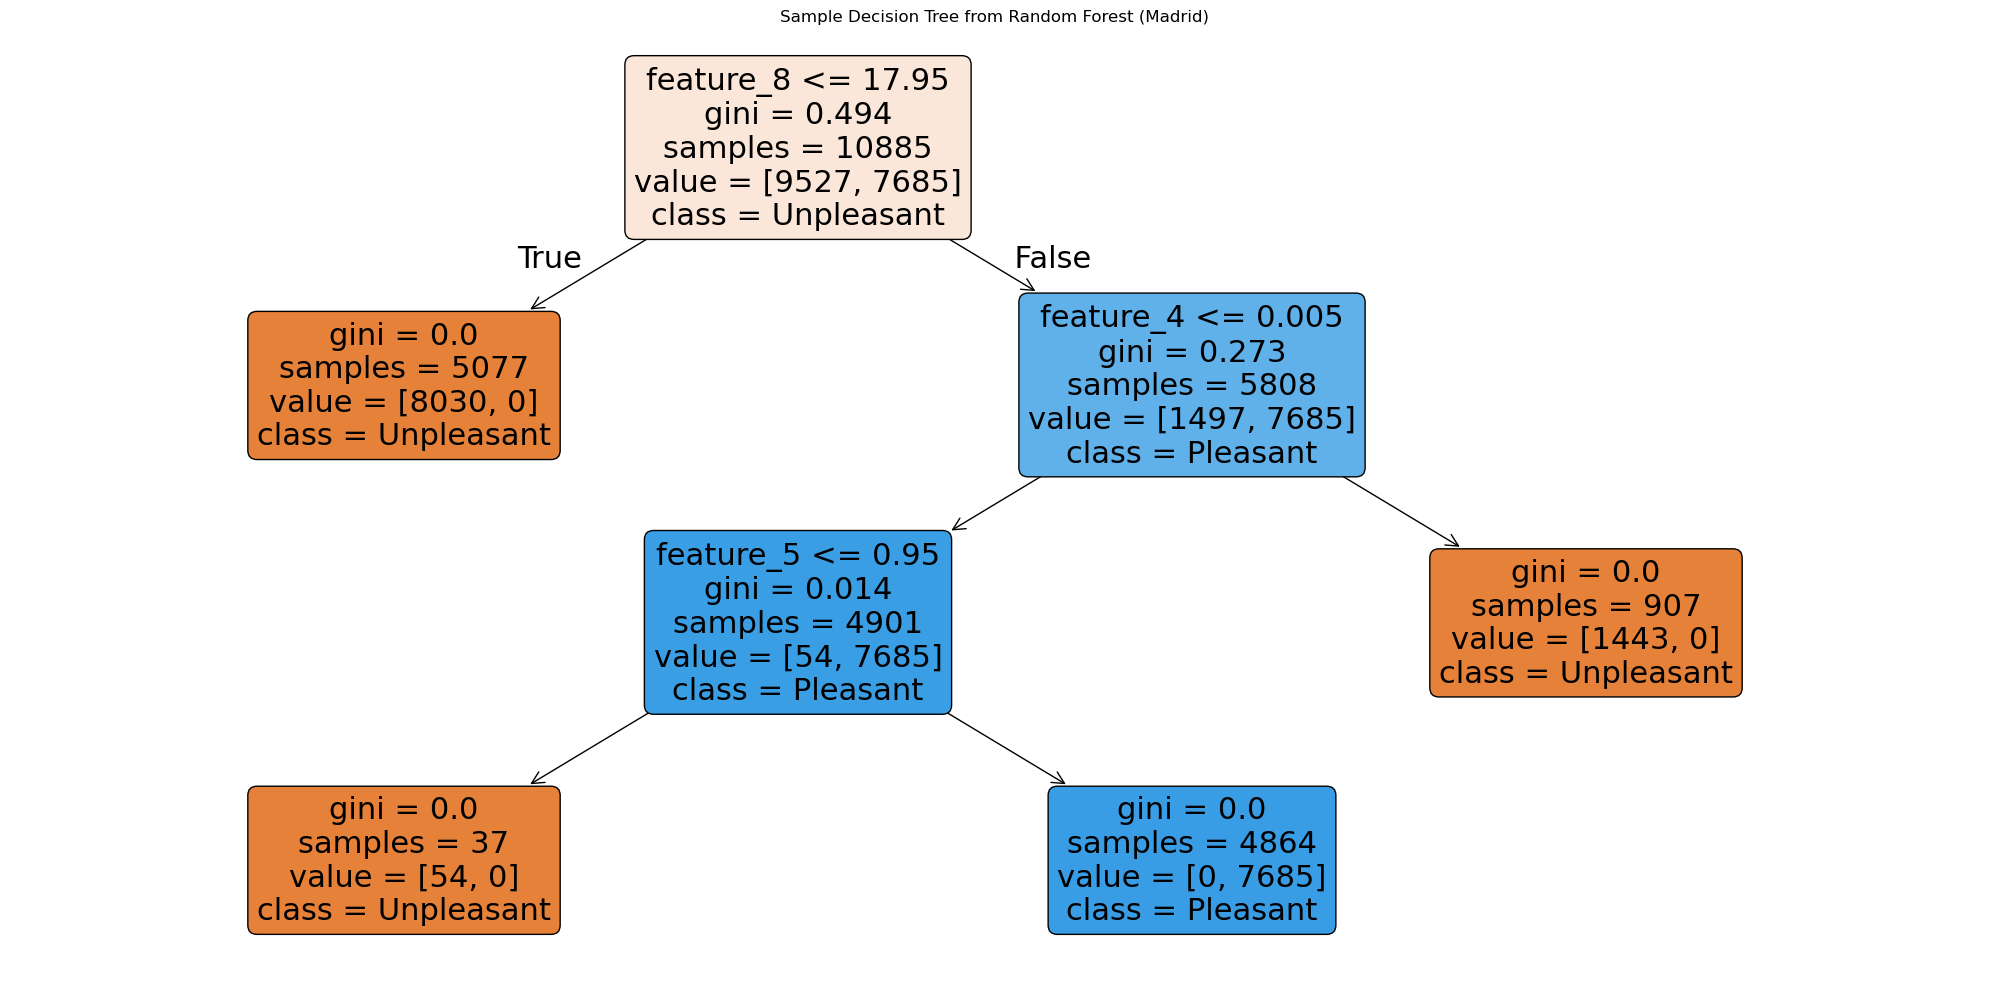

In [115]:
# Step 2: Plot the tree
fig1 = plt.figure(figsize=(20, 10))
plot_tree(
    one_tree,
    feature_names=[f'feature_{i}' for i in range(X_train.shape[1])],  # or actual names
    class_names=['Unpleasant', 'Pleasant'],  # Adjust based on your labels
    filled=True,
    rounded=True,
    max_depth=3  # Optional: limit depth for readability
)
plt.title("Sample Decision Tree from Random Forest (Madrid)")
plt.tight_layout()

In [117]:
fig1.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'tree_madrid_optimized.png'))

# 6 Weather Feature Importance Analysis: Madrid

In [124]:
# Create a list of weather features

wx_list = [feature.replace('MADRID_', '') for feature in madrid_list]
wx_list

['cloud_cover',
 'humidity',
 'pressure',
 'global_radiation',
 'precipitation',
 'sunshine',
 'temp_mean',
 'temp_min',
 'temp_max']

In [126]:
# Step 2: Get feature importances from trained model
importances = best_rf.feature_importances_


In [128]:
# Step 3: Create DataFrame for easy plotting/sorting
df_importance = pd.DataFrame({
    'Feature': wx_list,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

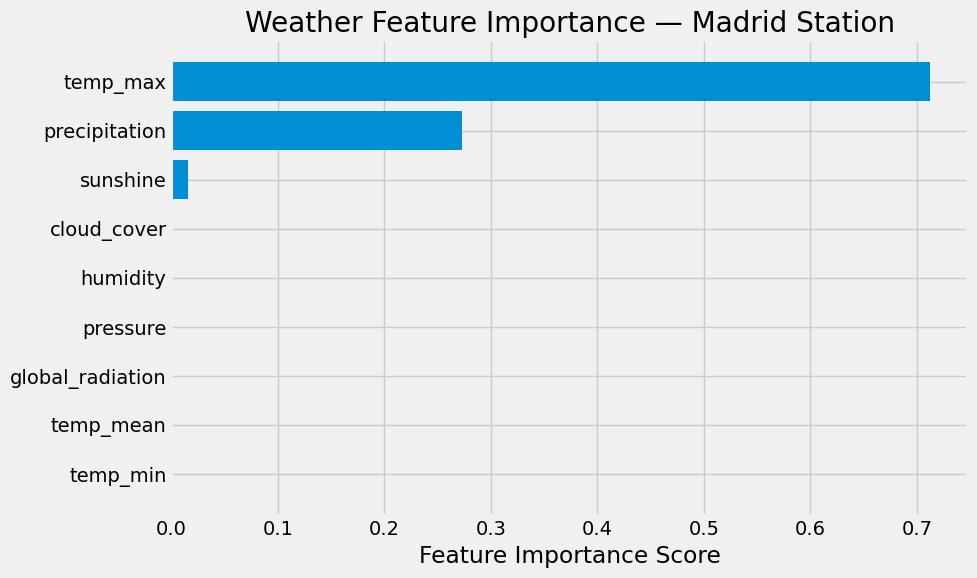

In [130]:
# Step 4: Plot
plt.style.use('fivethirtyeight')
fig2 = plt.figure(figsize=(10, 6))
plt.barh(df_importance['Feature'], df_importance['Importance'])
plt.xlabel("Feature Importance Score")
plt.title("Weather Feature Importance — Madrid Station")
plt.gca().invert_yaxis()  # Highest importance at top
plt.tight_layout()
plt.savefig("madrid_feature_importance.png", dpi=300)
plt.show()

In [132]:
df_importance

Feature  Importance
8          temp_max    0.712321
4     precipitation    0.272587
5          sunshine    0.015092
0       cloud_cover    0.000000
1          humidity    0.000000
2          pressure    0.000000
3  global_radiation    0.000000
6         temp_mean    0.000000
7          temp_min    0.000000

Maximum temperature and precipitation are most impotant features. The only other feature used was sunshine. The rest were not used at all in classifications. The optimized model used max_depth=3, which restricts how much splitting can happen. That often leads to fewer features being used. The model showed perfect perfomance, so these features are enough.

In [136]:
fig1.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'madrid_features_optimized.png'))